# Distance, Velocity and Acceleration

### Acceleration events

This Jupyter notebook shows the effects of acceleration on the position of an object. If you were driving a car, you can accelerate by stepping on the gas pedal and deccelerate by stepping on the brakes. You can change the values in the cell below to create a sequence of accelerations, with a corresponding sequence of durations for these accelerations.

In [35]:
accels = [ 0.5, -0.5, 0, -1, 1, 0 ]
durations = [ 15, 15, 20, 10, 10, 20 ]

### Graphs

Running the cell below will generate a graph of both the position of your accelerating/deccelerating object and its corresponding velocity.

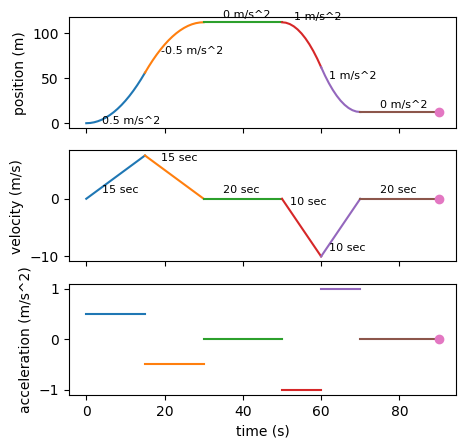

In [40]:
last_v = 0
last_d = 0
last_time = 0

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
f.set_dpi(100)
f.set_figwidth(5)
f.set_figheight(5)

ax1.set_ylabel("position (m)")
ax2.set_ylabel("velocity (m/s)")
ax3.set_ylabel("acceleration (m/s^2)")
ax3.set_xlabel("time (s)")

timesteps = np.array([])
positions = np.array([])
velocities = np.array([])
accelerations = np.array([])

for i in range(len(accels)):
    slice = np.linspace(0, durations[i], durations[i] + 1)
    ys = 0.5 * accels[i] * np.square(slice) + last_v * slice + last_d
    vs = accels[i] * slice + last_v
    ts = slice + last_time
    accs = [accels[i]] * (durations[i] + 1)
    last_v = vs[len(vs) - 1]
    last_d = ys[len(ys) - 1]
    last_time = sum(durations[:i + 1])
    timesteps = np.append(timesteps, ts)
    positions = np.append(positions, ys)
    velocities = np.append(velocities, vs)
    accelerations = np.append(accelerations, accs)
    if (ys[0] < ys[len(ys) - 1]):
        ypos = ys[len(ys) / 4] - 5
    else:
        ypos = ys[len(ys) / 4] + 5
    ax1.text(ts[len(ts) / 4], ypos, str(accels[i]) + " m/s^2", fontsize=8)
    if (vs[0] < vs[len(vs) - 1]):
        ypos = vs[len(vs) / 4] - 1
    else:
        ypos = vs[len(vs) / 4] + 1
    ax2.text(ts[len(ts) / 4], ypos, str(durations[i]) + " sec", fontsize=8)
    ax1.plot(ts, ys)
    ax2.plot(ts, vs)
    ax3.plot(ts, accs)

def expand_range(ax, data):
    min_val = min(data)
    max_val = max(data)
    mid = (max_val + min_val) / 2
    expansion = ((max_val - min_val) * 1.5) / 2
    ax.set_ylim((mid - expansion, mid + expansion))

expand_range(ax1, positions)
expand_range(ax2, velocities)
expand_range(ax3, accelerations)

position_marker, = ax1.plot(timesteps[0], positions[0], marker='o')
velocity_marker, = ax2.plot(timesteps[0], velocities[0], marker='o')
acceleration_marker, = ax3.plot(timesteps[0], accelerations[0], marker='o')

def animate(i):
    position_marker.set_data(timesteps[i], positions[i])
    velocity_marker.set_data(timesteps[i], velocities[i])
    acceleration_marker.set_data(timesteps[i], accelerations[i])
    return (position_marker, velocity_marker, acceleration_marker, )

anim = animation.FuncAnimation(f, animate, frames=len(timesteps), interval=100, blit=True)

import matplotlib.animation as animation

if u'ffmpeg' in animation.writers.list():
    HTML(anim.to_html5_video())    ### doesn't work without ffmpeg
else:
    filename = "acceleration.mp4"
    anim.save(filename, writer='avconv')
    import ipywidgets as widgets
    from IPython.display import display
    html = widgets.HTML("Your animation is ready for download: <a href='./" + filename + "' download>" + filename + "</a>")
    display(html)
